### Linear Regression Example

In [1]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
rng = numpy.random

In [15]:
learnin_rate = 0.01
training_epochs = 1000
display_step = 50

In [9]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [11]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

In [12]:
pred = tf.add(tf.multiply(X, W), b)

In [13]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learnin_rate).minimize(cost)

In [14]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.236406669 W= 0.47280124 b= -0.8042733
Epoch: 0100 cost= 0.217989564 W= 0.45952603 b= -0.70877254
Epoch: 0150 cost= 0.201699033 W= 0.44704038 b= -0.61895156
Epoch: 0200 cost= 0.187289655 W= 0.4352972 b= -0.5344722
Epoch: 0250 cost= 0.174544275 W= 0.42425257 b= -0.45501733
Epoch: 0300 cost= 0.163270831 W= 0.41386476 b= -0.38028845
Epoch: 0350 cost= 0.153299361 W= 0.4040948 b= -0.3100039
Epoch: 0400 cost= 0.144479528 W= 0.39490584 b= -0.2438995
Epoch: 0450 cost= 0.136678353 W= 0.38626337 b= -0.18172663
Epoch: 0500 cost= 0.129778266 W= 0.37813506 b= -0.12325149
Epoch: 0550 cost= 0.123675264 W= 0.37049 b= -0.06825423
Epoch: 0600 cost= 0.118277185 W= 0.3632998 b= -0.016527783
Epoch: 0650 cost= 0.113502719 W= 0.35653722 b= 0.032122158
Epoch: 0700 cost= 0.109279871 W= 0.3501767 b= 0.07787878
Epoch: 0750 cost= 0.105544917 W= 0.3441945 b= 0.12091404
Epoch: 0800 cost= 0.102241531 W= 0.33856815 b= 0.1613897
Epoch: 0850 cost= 0.099319838 W= 0.33327645 b= 0.19945818
Epoch: 0900 c

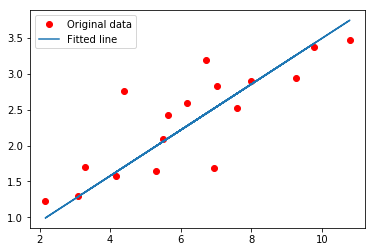

In [17]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch: %04d" %(epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), 'b=', sess.run(b))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print('training cost=', training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(train_X, train_Y, 'ro', label = 'Original data')
    plt.plot(train_X, sess.run(W)* train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()